In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
train = pd.read_csv('/content/train.csv')
print(train)
train.info()


              ID  Estimated_Insects_Count  Crop_Type  Soil_Type  \
0      F00000001                      188          1          0   
1      F00000003                      209          1          0   
2      F00000004                      257          1          0   
3      F00000005                      257          1          1   
4      F00000006                      342          1          0   
...          ...                      ...        ...        ...   
88853  F00155935                     3337          1          0   
88854  F00155938                     3516          1          0   
88855  F00155939                     3516          1          0   
88856  F00155942                     3702          1          0   
88857  F00155945                     3895          1          0   

       Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
0                           1                  0                0.0   
1                           1                  0     

In [ ]:
train.shape

(88858, 10)

In [ ]:
train.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
dtype: int64

In [ ]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mean(),inplace=True)

In [ ]:
train.drop(columns=["ID"],axis=1,inplace=True)
train.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [ ]:
print(train.columns)
print(train.shape)

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')
(88858, 9)


In [ ]:
X=train.drop(columns=['Crop_Damage'])
Y=train[["Crop_Damage"]]

In [ ]:
print(X)


       Estimated_Insects_Count  Crop_Type  Soil_Type  Pesticide_Use_Category  \
0                          188          1          0                       1   
1                          209          1          0                       1   
2                          257          1          0                       1   
3                          257          1          1                       1   
4                          342          1          0                       1   
...                        ...        ...        ...                     ...   
88853                     3337          1          0                       2   
88854                     3516          1          0                       2   
88855                     3516          1          0                       2   
88856                     3702          1          0                       2   
88857                     3895          1          0                       2   

       Number_Doses_Week  Number_Weeks_

In [ ]:
print(Y)

       Crop_Damage
0                0
1                1
2                1
3                1
4                1
...            ...
88853            0
88854            0
88855            0
88856            0
88857            0

[88858 rows x 1 columns]


In [ ]:
Y.value_counts()

Crop_Damage
0              74238
1              12307
2               2313
dtype: int64

Estimated_Insects_Count       Axes(0.125,0.747241;0.133621x0.132759)
Crop_Type                  Axes(0.285345,0.747241;0.133621x0.132759)
Soil_Type                   Axes(0.44569,0.747241;0.133621x0.132759)
Pesticide_Use_Category     Axes(0.606034,0.747241;0.133621x0.132759)
Number_Doses_Week          Axes(0.766379,0.747241;0.133621x0.132759)
Number_Weeks_Used             Axes(0.125,0.587931;0.133621x0.132759)
Number_Weeks_Quit          Axes(0.285345,0.587931;0.133621x0.132759)
Season                      Axes(0.44569,0.587931;0.133621x0.132759)
Crop_Damage                Axes(0.606034,0.587931;0.133621x0.132759)
dtype: object

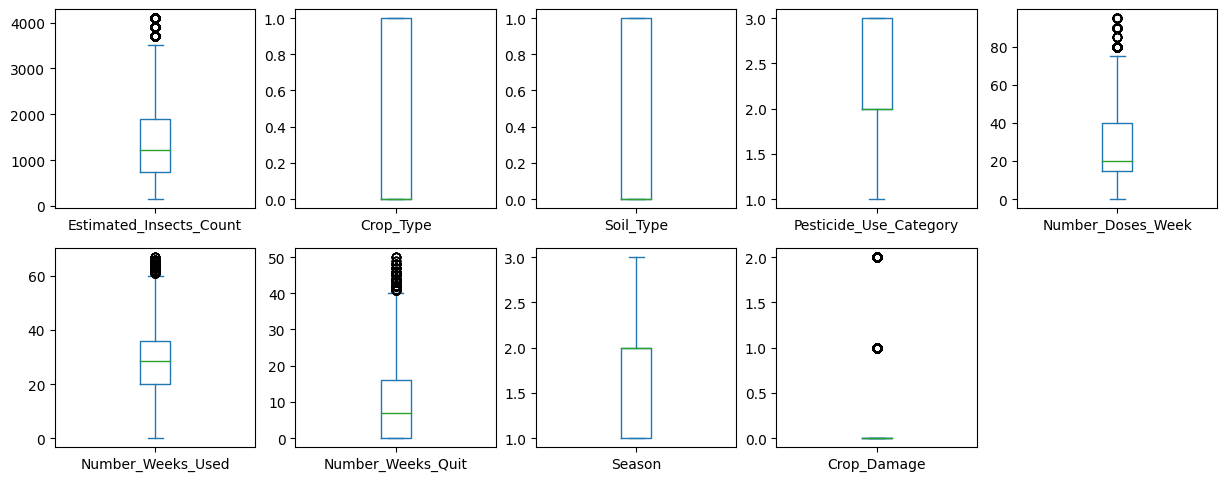

In [ ]:
train.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

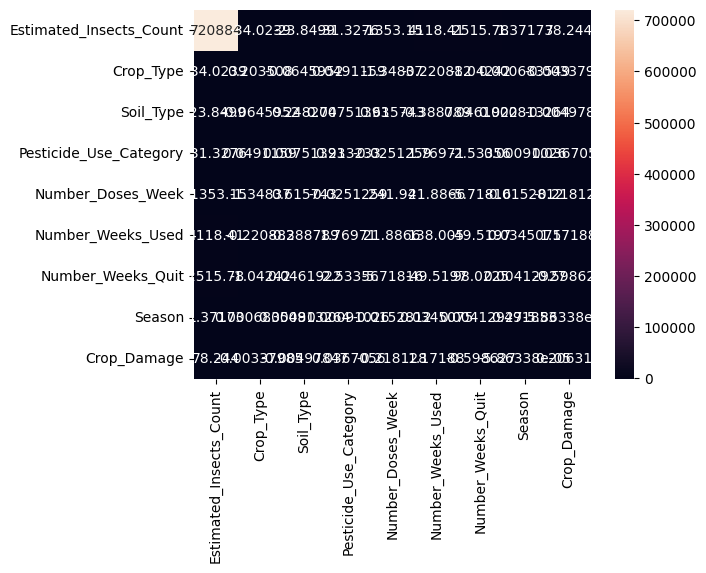

In [ ]:
import seaborn as sn
cov_matrix = pd.DataFrame.cov(train)
sn.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

<Axes: >

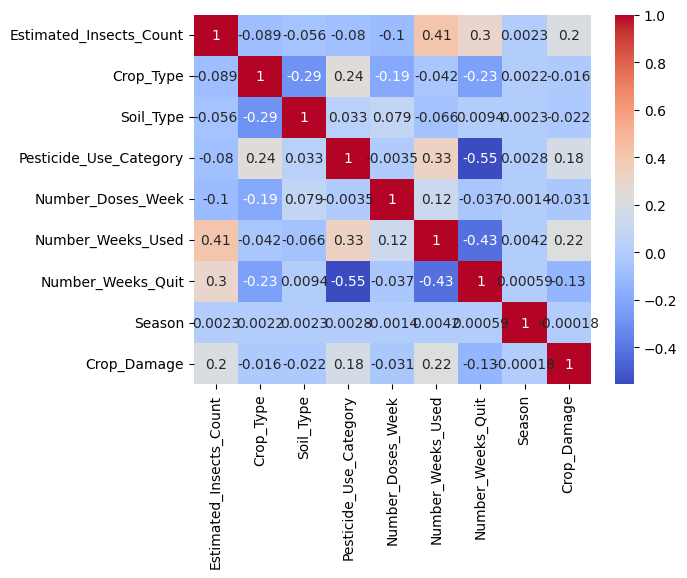

In [ ]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

<Figure size 1200x500 with 0 Axes>

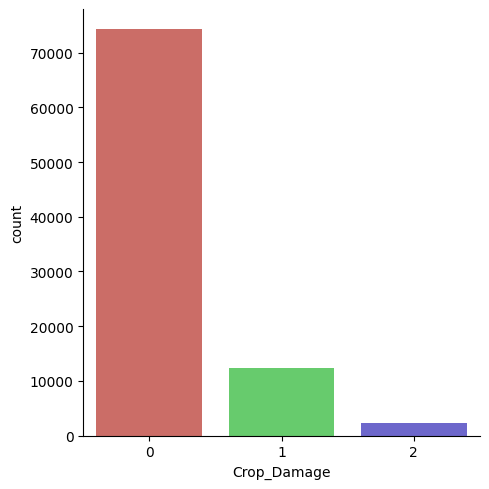

In [ ]:
import seaborn as s
plt.figure(figsize=(12,5))
s.catplot(x='Crop_Damage', data=train, palette="hls",kind='count')

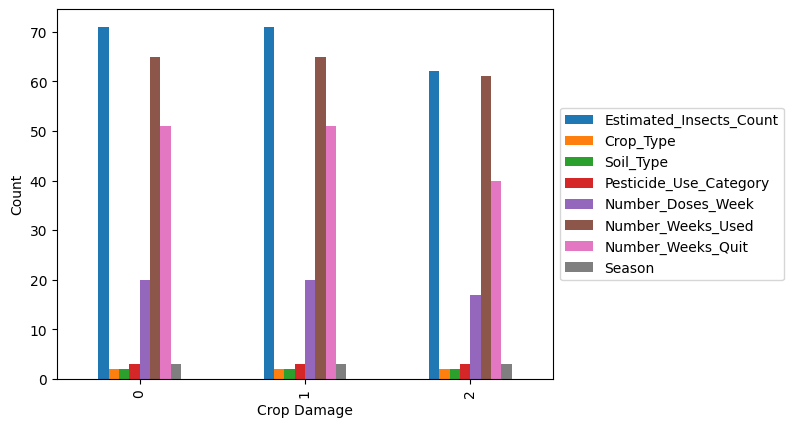

In [ ]:
grouped_data = train.groupby('Crop_Damage').nunique()
ax = grouped_data.plot(kind="bar")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Crop Damage")
plt.ylabel("Count")
plt.show()

In [ ]:
X=train.drop(columns=['Crop_Damage'])
Y=train[["Crop_Damage"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
X=pd.DataFrame(x,columns=X.columns)

LOGISTIC REGRESSION


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train.values.reshape(-1,))

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.8333508395480396
Accuracy score of the test data :  0.8331307674994373


In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[18350,   210,     0],
       [ 2919,   158,     0],
       [  538,    40,     0]])

Text(95.72222222222221, 0.5, 'Truth')

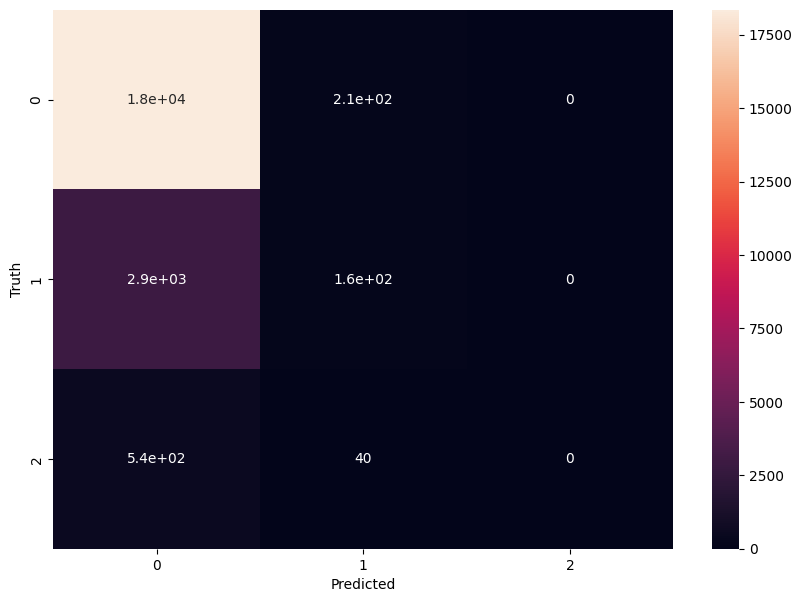

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        88858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.1 MB


In [ ]:
from sklearn.metrics import classification_report
y_pred=classifier.predict(X_test)
print(classification_report(Y_test,y_pred))
print("accuracy score in knn is:",accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     18560
           1       0.41      0.21      0.28      3077
           2       0.17      0.02      0.04       578

    accuracy                           0.83     22215
   macro avg       0.48      0.40      0.41     22215
weighted avg       0.78      0.83      0.80     22215

accuracy score in knn is: 0.8298897141571011


In [ ]:
print("accuracy score in knn is:",accuracy_score(Y_test,y_pred))
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

accuracy score in knn is: 0.8298897141571011
Accuracy score of the test data :  0.8331307674994373


In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[18350,   210,     0],
       [ 2920,   157,     0],
       [  538,    40,     0]])

Text(95.72222222222221, 0.5, 'Truth')

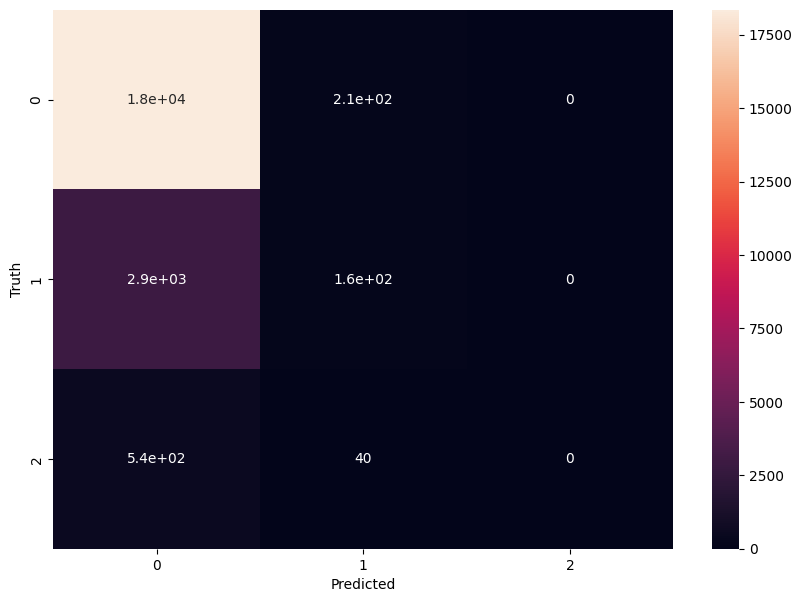

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=109)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train.values.reshape(-1,))

SVC(kernel='linear')

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8328831870357867


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[22203,     0,     0],
       [ 3747,     0,     0],
       [  708,     0,     0]])

Text(95.72222222222221, 0.5, 'Truth')

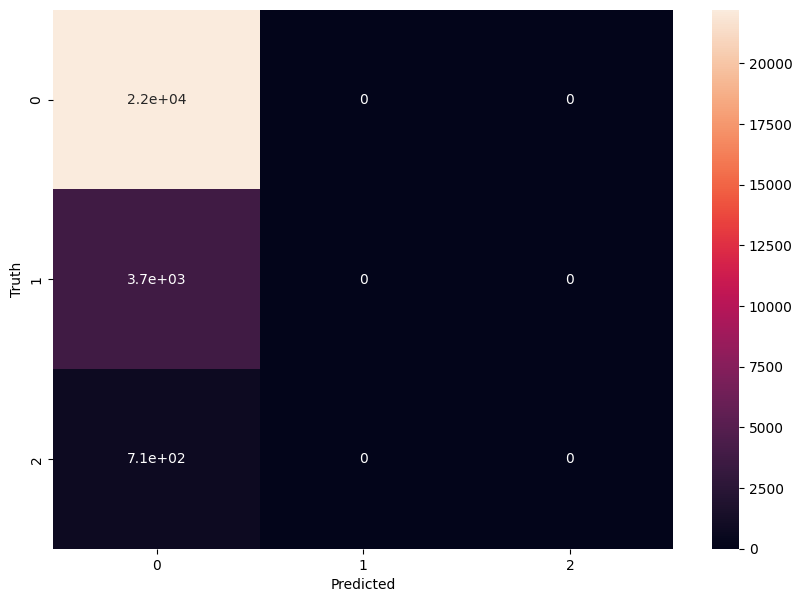

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, Y_train.values.reshape(-1))
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 82.57371145622328


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = 0.25,stratify=y_res, random_state=2)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.67


In [ ]:
accuracy_lr=0.8333508395480396
accuracy_knn=0.8298897141571011
accuracy_svm=0.8328831870357867
accuracy_rf=82.29237002025658
accuracy_xg=0.62

<ipython-input-132-7710cca63f9f>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


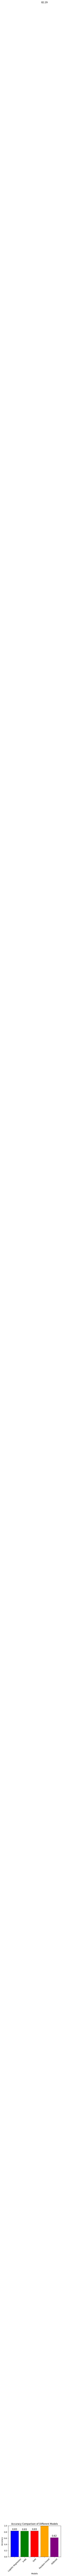

In [ ]:
import matplotlib.pyplot as plt

# List of model names and their corresponding accuracies
model_names = ['Logistic Regression', 'k-NN', 'SVM',  'Random Forest','XGBoost']
accuracies = [accuracy_lr, accuracy_knn, accuracy_svm,  accuracy_rf,accuracy_xg]

# Create a bar plot to visualize the accuracies
plt.figure(figsize=(5, 3))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange','purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1 for accuracy values
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

AFTER BALANCING THE DATA

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(sampling_strategy="not majority")
x_res,y_res=ros.fit_resample(X,Y)

In [ ]:
y_res.value_counts()

Crop_Damage
0              74238
1              74238
2              74238
dtype: int64

<Figure size 1200x500 with 0 Axes>

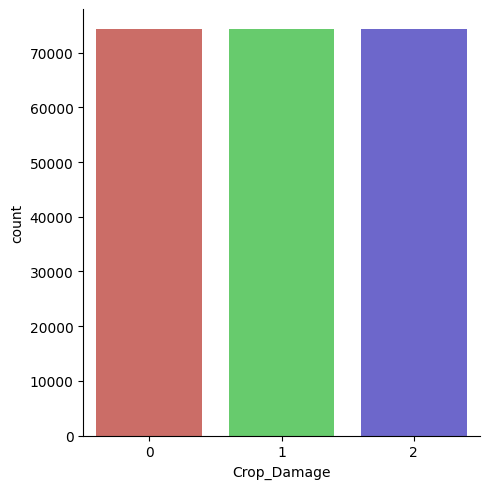

In [ ]:
import seaborn as s
plt.figure(figsize=(12,5))
s.catplot(x='Crop_Damage', data=y_res, palette="hls",kind='count')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x_res)
x_res=pd.DataFrame(x,columns=x_res.columns)

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = 0.25,stratify=y_res, random_state=2)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train.values.reshape(-1,))

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.5180111952584787
Accuracy score of the test data :  0.5201063237486305


In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[12139,  2122,  4299],
       [ 5499,  3588,  9473],
       [ 3585,  1742, 13232]])

Text(95.72222222222221, 0.5, 'Truth')

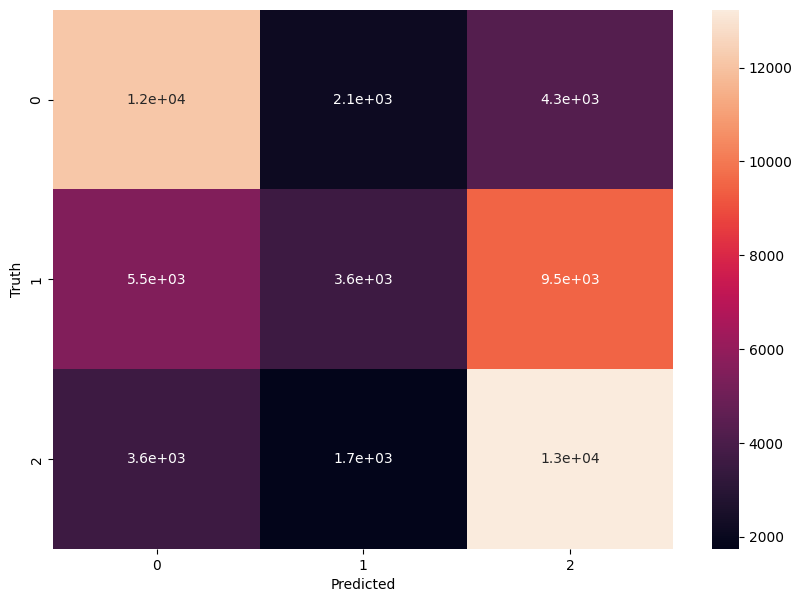

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_res,y_res, test_size = 0.25,stratify=y_res, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report
y_pred=classifier.predict(X_test)
print(classification_report(Y_test,y_pred))
print("accuracy score in knn is:",accuracy_score(Y_test,y_pred))
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

              precision    recall  f1-score   support

           0       0.92      0.66      0.77     18560
           1       0.75      0.91      0.82     18560
           2       0.92      0.99      0.95     18559

    accuracy                           0.85     55679
   macro avg       0.86      0.85      0.85     55679
weighted avg       0.86      0.85      0.85     55679

accuracy score in knn is: 0.8529607212773218
Accuracy score of the test data :  0.5201063237486305


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[12298,  5347,   915],
       [ 1020, 16809,   731],
       [    0,   174, 18385]])

Text(95.72222222222221, 0.5, 'Truth')

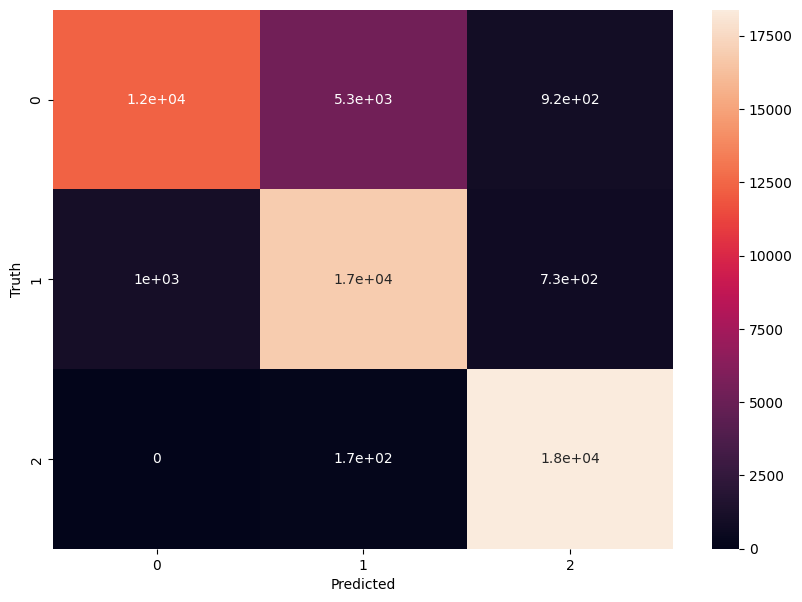

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(x_res,y_res, test_size = 0.25,stratify=y_res, random_state=2)
d=DecisionTreeClassifier()
d=d.fit(X_train,Y_train.values.reshape(-1,))
Y_pred=d.predict(X_test)
print('accuracy of training data:',metrics.accuracy_score(Y_test,Y_pred))
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

accuracy of training data: 0.9249268126223531
Accuracy score of the test data :  0.5201063237486305


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, Y_train.values.reshape(-1))
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 95.06095233819006


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size = 0.25,stratify=y_res, random_state=2)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, Y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.99      0.82      0.89     18560
           1       0.86      0.96      0.91     18560
           2       0.94      1.00      0.97     18559

    accuracy                           0.92     55679
   macro avg       0.93      0.92      0.92     55679
weighted avg       0.93      0.92      0.92     55679



In [ ]:
accuracy_lr= 0.5180111952584787
accuracy_knn=0.8535174841502182
accuracy_svm=0.8354715282466801
accuracy_rf= 94.98013155826955
accuracy_xg=0.92

<ipython-input-127-0037df52dfd8>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


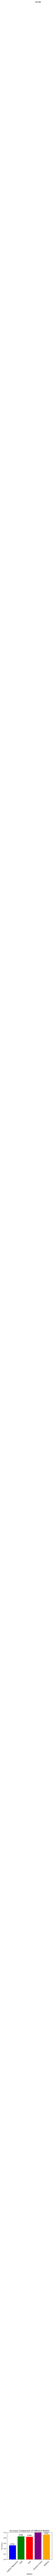

In [ ]:
import matplotlib.pyplot as plt

# List of model names and their corresponding accuracies
model_names = ['Logistic Regression', 'k-NN', 'SVM','Random Forest','XGBoost']
accuracies = [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_rf,accuracy_xg]

# Create a bar plot to visualize the accuracies
plt.figure(figsize=(5, 3))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1 for accuracy values
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()